RandomForest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from scipy.stats import shapiro, normaltest, kstest
import joblib

# Configuraciones para la visualización
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


In [2]:
# Cargar el archivo CSV procesado
data = pd.read_csv("../data/processed/data_cleaned_no_outliers.csv")

# Separar las características (X) y la variable objetivo (y)
X = data.drop(columns=["PorcentajeCumplimiento"])
y = data["PorcentajeCumplimiento"]


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Definir la cuadrícula de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2', None]
}

# Definir el modelo base
model = RandomForestRegressor(random_state=42)

# Configurar el GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1, 
                           scoring='neg_mean_squared_error', verbose=2)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Mejor conjunto de hiperparámetros
print(f"Mejores hiperparámetros: {grid_search.best_params_}")


Fitting 10 folds for each of 648 candidates, totalling 6480 fits
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_esti

In [5]:
# Evaluar el mejor modelo
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Métricas para el conjunto de prueba
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
explained_variance_test = explained_variance_score(y_test, y_test_pred)

# Métricas para el conjunto de entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
explained_variance_train = explained_variance_score(y_train, y_train_pred)

# Imprimir resultados
print("Métricas para el conjunto de prueba:")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"R² Score: {r2_test}")
print(f"Explained Variance Score: {explained_variance_test}")

print("\nMétricas para el conjunto de entrenamiento:")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
print(f"Mean Absolute Error (MAE): {mae_train}")
print(f"R² Score: {r2_train}")
print(f"Explained Variance Score: {explained_variance_train}")


Métricas para el conjunto de prueba:
Mean Squared Error (MSE): 0.008435147168856917
Root Mean Squared Error (RMSE): 0.09184305727085154
Mean Absolute Error (MAE): 0.06188118225393133
R² Score: 0.11676000864741409
Explained Variance Score: 0.11680064048763306

Métricas para el conjunto de entrenamiento:
Mean Squared Error (MSE): 0.00795977946056122
Root Mean Squared Error (RMSE): 0.08921759613754016
Mean Absolute Error (MAE): 0.05957422122545983
R² Score: 0.20004446979705404
Explained Variance Score: 0.20004549942679695


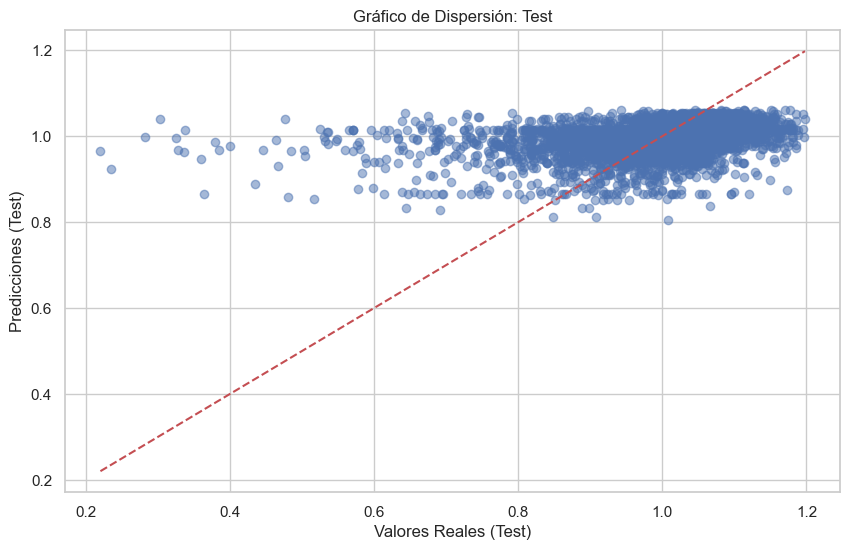

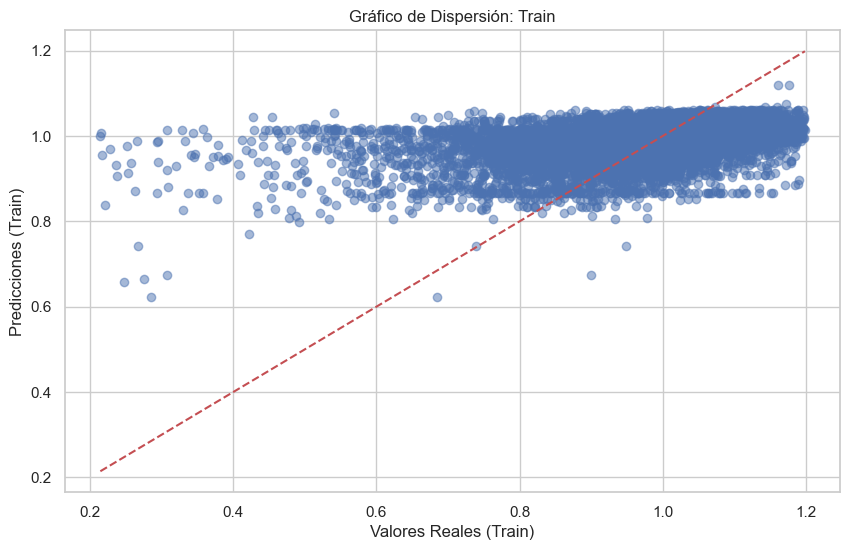

In [6]:
# Gráfico de dispersión para el conjunto de prueba
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Valores Reales (Test)")
plt.ylabel("Predicciones (Test)")
plt.title("Gráfico de Dispersión: Test")
plt.show()

# Gráfico de dispersión para el conjunto de entrenamiento
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--r')
plt.xlabel("Valores Reales (Train)")
plt.ylabel("Predicciones (Train)")
plt.title("Gráfico de Dispersión: Train")
plt.show()


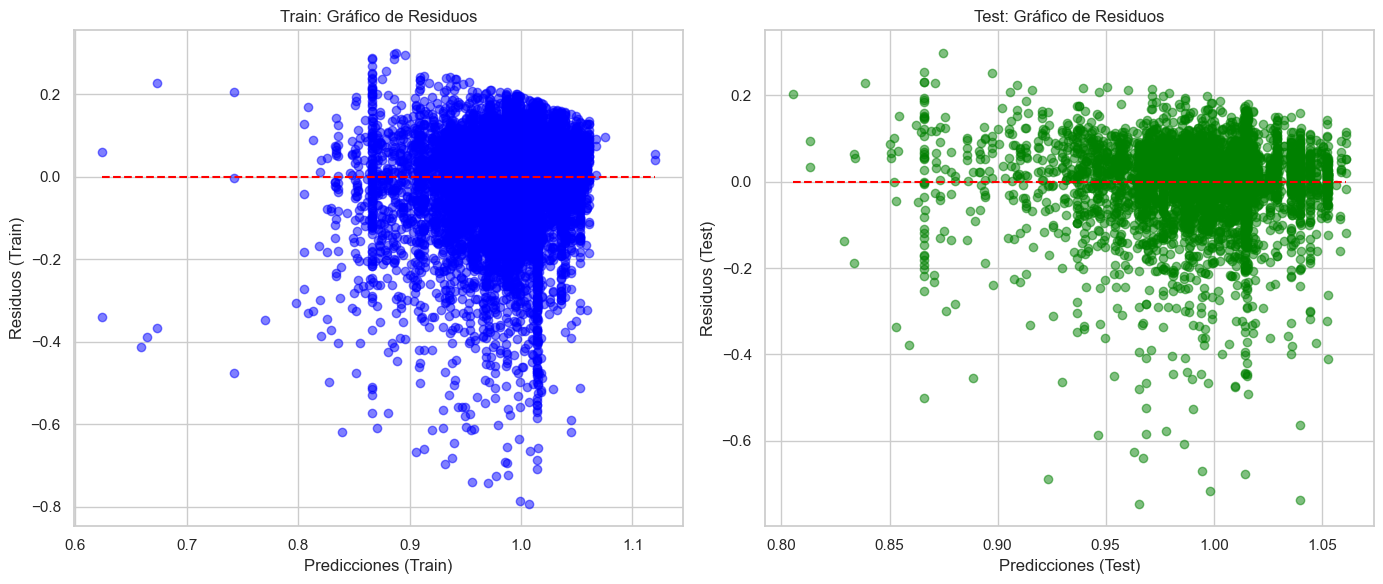

In [7]:
# Gráfico de residuos para el conjunto de entrenamiento y prueba
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, y_train - y_train_pred, alpha=0.5, color='blue')
plt.hlines(y=0, xmin=y_train_pred.min(), xmax=y_train_pred.max(), colors='red', linestyles='--')
plt.xlabel("Predicciones (Train)")
plt.ylabel("Residuos (Train)")
plt.title("Train: Gráfico de Residuos")

plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, y_test - y_test_pred, alpha=0.5, color='green')
plt.hlines(y=0, xmin=y_test_pred.min(), xmax=y_test_pred.max(), colors='red', linestyles='--')
plt.xlabel("Predicciones (Test)")
plt.ylabel("Residuos (Test)")
plt.title("Test: Gráfico de Residuos")

plt.tight_layout()
plt.show()


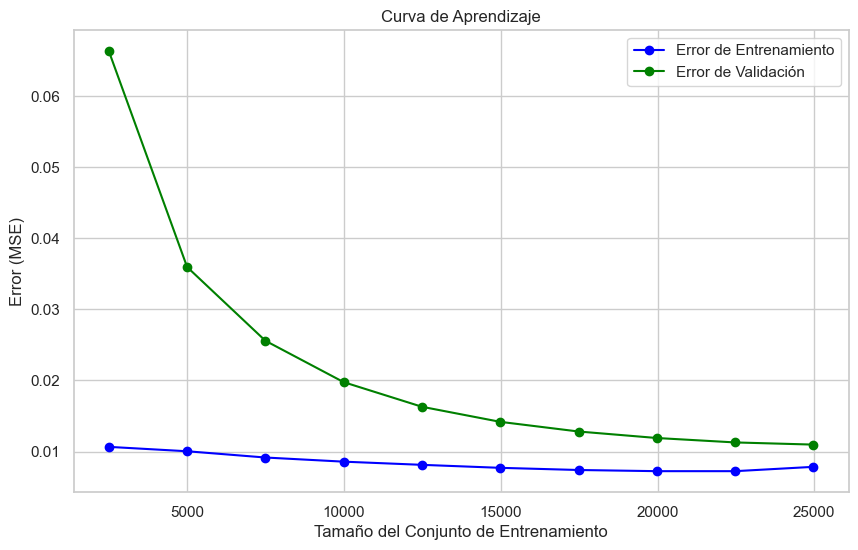

In [8]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=10, scoring='neg_mean_squared_error', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Error de Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="green", label="Error de Validación")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Error (MSE)")
plt.title("Curva de Aprendizaje")
plt.legend(loc="best")
plt.show()


In [9]:
# Guardar el modelo entrenado con los mejores hiperparámetros
joblib.dump(best_model, "../models/optimized_random_forest_model.pkl")


['../models/optimized_random_forest_model.pkl']